# 보스턴 주택 가격 예측

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


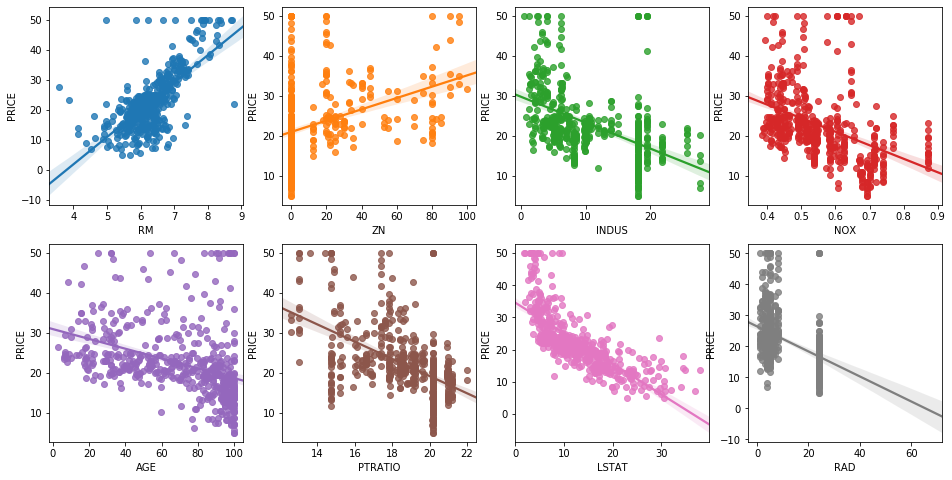

In [4]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col]) # regplot()는 선형 회귀 모델 plot을 보여준다

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print('MSE: {}, RMSE: {}, R2: {}'.format(mse, rmse, r2))

MSE: 29.86990952614383, RMSE: 5.465337091721226, R2: 0.7156817756567985


In [6]:
print(lr.intercept_) # y 절편
print(lr.coef_) # 가중치

41.873043423689104
[-1.08158663e-01  5.32447809e-02  5.04998254e-04  1.90753010e+00
 -1.70386182e+01  2.90237569e+00  7.41598755e-04 -1.49181272e+00
  3.13045626e-01 -1.48773353e-02 -9.20955070e-01  8.35946439e-03
 -4.73862147e-01]


In [7]:
coeff = pd.Series(data=lr.coef_, index=X.columns)
coeff.sort_values(ascending=False)

RM          2.902376
CHAS        1.907530
RAD         0.313046
ZN          0.053245
B           0.008359
AGE         0.000742
INDUS       0.000505
TAX        -0.014877
CRIM       -0.108159
LSTAT      -0.473862
PTRATIO    -0.920955
DIS        -1.491813
NOX       -17.038618
dtype: float64

In [10]:
from sklearn.model_selection import cross_val_score

y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
5.828658946215838
